<a href="https://colab.research.google.com/github/handikanurichsan/predictive_maintenance_xgboost/blob/main/predictive_maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
shivamb_machine_predictive_maintenance_classification_path = kagglehub.dataset_download('shivamb/machine-predictive-maintenance-classification')

print('Data source import complete.')


Using Colab cache for faster access to the 'machine-predictive-maintenance-classification' dataset.
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/machine-predictive-maintenance-classification/predictive_maintenance.csv


In [3]:
import pandas as pd

# Construct the full path to the CSV file
file_path = os.path.join(shivamb_machine_predictive_maintenance_classification_path, 'predictive_maintenance.csv')

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first 5 rows of the DataFrame
display(df.head())

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
df.shape

(10000, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [6]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [7]:
df = df.drop(["UDI", "Product ID", "Failure Type"], axis=1)

In [8]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


In [9]:
df = pd.get_dummies(df, columns=["Type"], drop_first=True)

In [10]:
X = df.drop("Target", axis=1)
y = df["Target"]

In [12]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Clean column names for XGBoost compatibility
X.columns = X.columns.str.replace(r'[\[\]<]', '', regex=True).str.replace(' ', '_')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = XGBClassifier()

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [13]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1939
           1       0.77      0.66      0.71        61

    accuracy                           0.98      2000
   macro avg       0.88      0.82      0.85      2000
weighted avg       0.98      0.98      0.98      2000



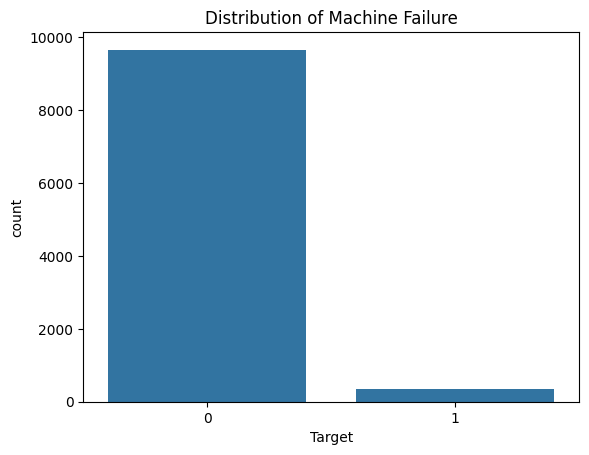

Target
0    0.9661
1    0.0339
Name: proportion, dtype: float64


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title("Distribution of Machine Failure")
plt.show()

print(y.value_counts(normalize=True))

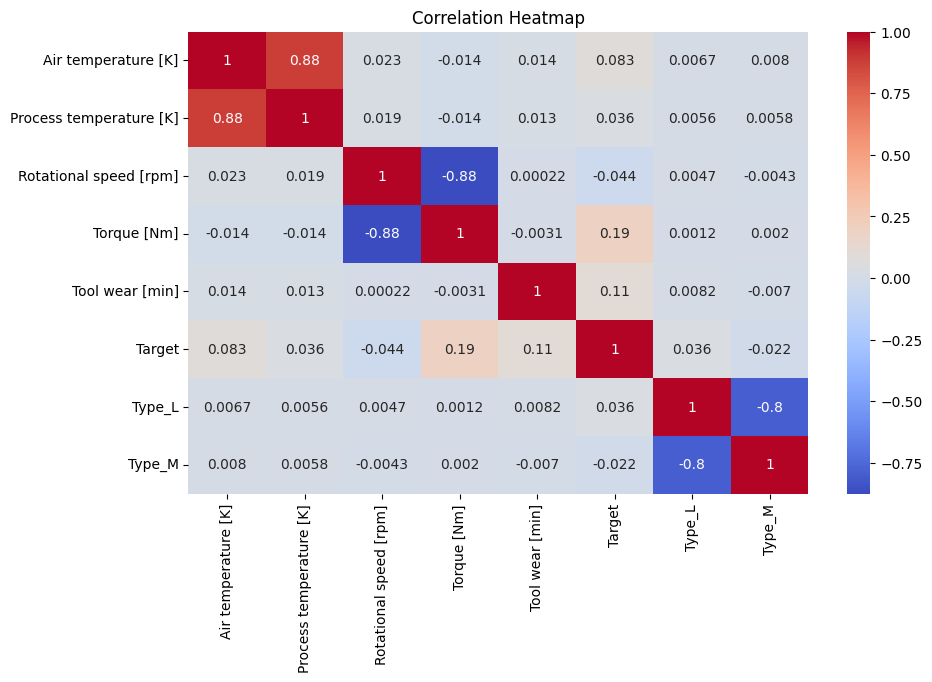

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [26]:
import numpy as np

importance = model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importance
})

importance_df = importance_df.sort_values("Importance", ascending=False)

importance_df

,Feature,Importance
3,Torque_Nm,0.269424
0,Air_temperature_K,0.176278
4,Tool_wear_min,0.152636
2,Rotational_speed_rpm,0.123035
1,Process_temperature_K,0.113026
5,Type_L,0.110122
6,Type_M,0.055480


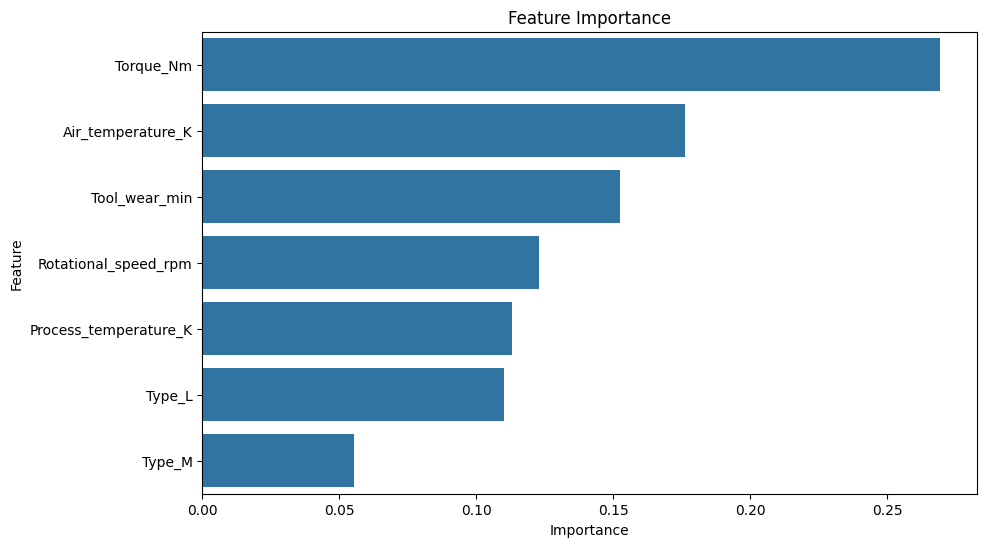

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance")
plt.show()

In [23]:
import joblib

joblib.dump(model, "predictive_maintenance_xgboost.pkl")

['predictive_maintenance_xgboost.pkl']

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

Random Forest:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.88      0.57      0.69        61

    accuracy                           0.98      2000
   macro avg       0.93      0.79      0.84      2000
weighted avg       0.98      0.98      0.98      2000



In [22]:
from sklearn.metrics import accuracy_score

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


XGBoost Accuracy: 0.9835
Random Forest Accuracy: 0.9845


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("XGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

XGBoost Performance:
Accuracy: 0.9835
Precision: 0.7692307692307693
Recall: 0.6557377049180327
F1 Score: 0.7079646017699115
